<a href="https://colab.research.google.com/github/kheit9527/2025_TCFST_Python_ML/blob/main/250721_Python_ML_Class07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
中小型模型(我們學習的目標) v.s. LLM(大型語言模型，乃至於AGI通用人工智慧<問什麼都能答>)
深度學習目標: 模仿人類神經
接受刺激 -> 彙總再一起 -> 傳到下一個神經元
(接收 -> 合併 -> 輸出訊號)


全有全無率: (類似膝跳反應、靜/動摩擦力)
    到一個臨界值後自動反映
    神經沒有連續概念(只有"有"or"沒有)
    門檻: Threshold(幾乎是瞬間，但還是有上升過程)
    Ex. 吃辣之前沒有程度之分，吃了才有感受到辣

x1 -> w1 (加權值)
x2 -> w2
-> w1x1 + w2x2 (激活函式)

Activation(激活函式, 超過數值才"激活", 否則沒激活)

神經套用到分類問題? -> 可以

Perceptron(感知器): 二維砍一刀直線、三維砍出一個面

線性分類器問題: 分類器只能做為分辨0(False)/1(True)功能，很難分類

線性分類不能做日常生活問題 -> 該怎麼做可以讓Perceptron不是切一條直線(侷限性太大)

Perceptron改轉換函式: "Sigmoid函式"
幾乎瞬間爬升 -> S型爬升(門檻值=0.5)
數學式: y = 1/1+e^(-x)
        if x = 0, y = 0.5
        x -> 無限, y趨近於1
        x -> 負無限, y趨近於0
稱為Logistic Regression
(羅吉斯迴歸<還是一種分類, 可能性依舊只有兩種(活or不活)>)

Perceptron可以做多元分類(看你的東西離哪一個門檻值近，以鳶尾花為例, 是/不是某一種)

線性分類 v.s. 非線性分類
決策樹? -> 非線性分類(雖然每一刀都是線性, 但不只砍了一刀, 砍很多刀某種程度上也是有曲線的感覺)

@Case: Titanic: 用原始資料產出更多欄位

x1 | x2    m1 | m2
--------------------
 1 | 3     1  |  9
 2 | 4     4  | 16

(m1 = x1^2, m2 = x2^2)
m1 + m2 = score (for w1.w2 = 1)

*** 雖然m1+m2=Threshold會是直線(線性),
    但轉換為x1^2+x2^2會是圓形(非線性)
    <不同角度看會有不同感覺>
    <欄位重組, 再做線性分類>

*** 我們還是使用線性分類, 但是是因為我們對原始資料進行了轉換(非線性轉換)

解決線性分類最好的辦法, 就是把它當成"多層"的東西
-> Muiti-Layer Perceptron(MLP, 多層感知器)
-> x1. x2真的重組出兩個欄位(a1x1+a2x2以及b1x1+b2x2, 等於長出了兩個神經)
{前述步驟稱為組合(中間)}

-> 再經過Sigmoid函數轉換: sig(Sigma.aixi), 得到m1(同理, sig(Sigma.bixi), 得到m2)
{多層感知器的精隨}

-> m1. m2丟到Perceptron(賦予加權w1. w2)
-> 得到分類器
*** 關鍵點: Sigmoid轉換把非線性給加上

*** 多層是為了解決線性無法分類的問題
*** 多層是因為激活函式才有非線性

加權參數要怎麼求? (w1. w2到底該是多少?)
第1步: Try and Error(經由嘗試)
    -> 隨機你的w1和w2
第2步: y'(經由隨機模型, 計算出來的值)
第3步: y'跟y靠攏(w1.w2變多或是變少)
Ex. w1x1 + w2x2 = y
    x1 = 20, x2 = 30, y = 50

1.假設w1=5, w2=2
2.計算y' = 5*20+2*30 = 160
3.y'比y大, 所以w1.w2需要變少
3-1. w1改為4.9, w2改為1.9
(問題: 靠攏程度到底要多少?
-> 損失函式 Loss = y'和y的距離
   Loss = (y'-y)^2 )
(我們會讓y'=y的時候, 是你的最小值 -> 下山理論)

*** 假設隨機一座山, 被綁架丟在山上(沒地圖手機), 走到谷底才能活
(故事 -> 數學化)
Step. 朝下山的方向走 -> 斜率
    <一個東西變動時, 如何影響另一個東西?>
    m = delta.y / delta.x
    <大小: 坡度, 方向: 往左or往右斜>
    x: 選擇(方向) y:不可控(山)
    -> 往斜率的反方向走(斜率下降法)
*** 決定方向: 正負號
    決定大小: 斜率的絕對值
    (斜率很大就大步，很小就小步)


```



```
問題1:
如果在多層感知器最後已經使用Sigmoid來達到類似於Scaling的效果, 那重組階段的激活函式還必須使用Sigmoid嗎?
(可否使用類似於x^2之類的非線性函式?)


```



250723_Python_ML_Class08


```
MLP(多層感知器):
Step1. 確定架構(係數隨機)
    28x28 黑白圖片, 784個位置, 每個位置有值
    0: Black 255:White
    x1.x2.x3 ... x784 -> 輸入層
    
    輸入組合時, 通常會越來越小(784 -> 392 ...)
    組合後 -> Sigma.wixi
    -> 激活函式轉換(Sigmoid函式)
    問題: 要變小多少(幾個神經)? -> 都可以, 你爽就好
    老師習慣: 1000 -> 100 -> 10 -> 1
    *** 不過, 通常都選2的n次方
    784 -> 64 or 128 or 256個
    問題簡單: 少一點係數; 問題複雜: 多一點係數
    (超參數的選擇憑經驗，但架構大小會根據問題難度而不同)

    選128個 -> 組合成m1.m2.m3 ... m128
    ** 之前只有0跟1(二元分類)
    多種分類該怎麼做? -> 多個輸出
        a. 是0的機率(Sigmoid -> 0~1)
        b. 是1的機率(Sigmoid -> 0~1)
        ...
        j. 是9個機率(Sigmoid -> 0~1)

Step2. 調整每個係數predict -> true
    要先準備一個損失函數(loss):
    當你的pred=true時, 必須是最小值
    ** 白話文: 你跟正確答案的距離
    
    最簡單: mse loss (1/n Sigma.(pred-true)^2)

    損失函式如何定義?
    Ex. 假設正確答案=5 -> 是5的機率=1, 其他=0
        -> one-hot encoding
    Ex2.假設機率為(0,1,0), 你猜(0.2,0.5,0.3)
        -> mse: 1/3 * (0.2-0)^2 + (1-0.5)^2 + (0.3-0)^2

Step3. 調整方向: 斜率下降法(負向斜率)
    知道斜率 -> 大小:斜率絕對值, 方向:斜率負向
    意即 w(加權)的調整 -> 斜率反方向
    公式: m(斜率) = delta.y/delta.x
         (x變動時, y如何變動?)
    
    ** 如果今天有方程式, 如何求斜率? -> 微分
    Ex. y = x^n
        m(斜率) = nx^(n-1)

    三次元調整: w1.w2.loss
    往哪邊走? ->分成兩個方向
    -> 南北往一個方向.東西往一個方向
    -> 調w1時, 固定w2, 求delta.loss/delta.w1
       (w2的調整同理)

    ** 每一個係數的下一個值,
       會等於"現在的值 - 偏微分(負向斜率) * 步長(常數)"
       Ex. loss = 3*w1^2 + 2*w2^3
           m*w1 = ∂(3*w1^2)/∂w1 = 6*w1
           m*w2 = ∂(2*w2^3)/∂w2 = 6*w2^2

```


```
深度學習函式庫:
1. pytorch
2. tensorflow
```



In [ ]:
from tensorflow.keras.datasets import mnist
# [[x_train, y_train], [x_test, y_test]] list中的list
((x_train, y_train), (x_test, y_test)) = mnist.load_data()


In [ ]:
# 看到array: numpy array
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


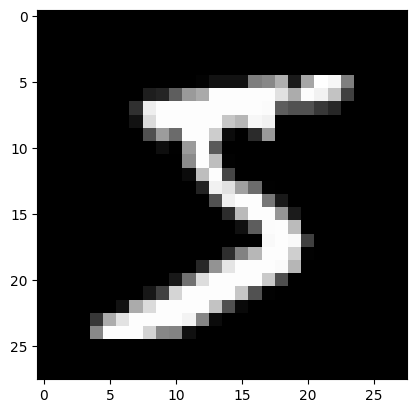

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = "gray")

```
RGB: 0-255(強度劃分)
為什麼是RGB? -> 電腦輸出是RGB(電腦螢幕射出的強度)
噴墨印表機? -> CMYK
石蕊試紙變色? -> HSV(色相)

!!! RGB 0~255的強度是人訂的
```



In [ ]:
# 先建立地基: Sequential(一層一層), Model(彈性, 可隨意建)
from tensorflow.keras.models import Sequential

# 每一層就是一個Layer, Dense Layer:(全連接層, 前面有幾個元素, 我就有幾個係數)
from tensorflow.keras.layers import Dense

# 輸入不須準備, 因為原始資料就是輸入本身, 直接建立第二層之後即可
layers = [
    # 緩解梯度消失: 只要不是最後一層, 激活函式都寫relu
    Dense(128, activation = "relu", input_dim = 784),
    Dense(10, activation = "sigmoid")
]

model = Sequential(layers)
model.summary()


In [ ]:
# model.compile(loss="mse", metrics=["accuracy"]) # metrics可以選擇評估標準

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss = CategoricalCrossentropy(), metrics = ["accuracy"])

In [ ]:
# 5 -> 0 0 0 0 0 1 0 0 0 0 (換成one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)
print(y_train[0])
print(y_train_cat[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# demo: numpy reshape
import numpy as np
n = np.array([
    [1,2,3],
    [4,5,6]
])
print(n.shape)
print(n.reshape(3,2))
print(n.reshape(6,1))
print(n.reshape(1,6))

print(n.reshape(-1,2))
print(n.reshape(3,-1))

(2, 3)
[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 2 3 4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [ ]:
print(x_train.shape)

# 攤平
x_train_norm = x_train.reshape(60000, 784) / 255.0 # 除255可將偏差過大的值拉回來
x_test_norm = x_test.reshape(10000, 784) / 255.0
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


```
看到一筆資料: ∂.loss/∂.w
batch size: 你看多少筆資料才實行一次梯度下降
epochs: 整份資料看幾輪(不要太多次，防止過擬合)
validation_split: 切出一部分資料, 之後驗證用

```


In [ ]:
# model.fit(x = x_train_norm,
#           y = y_train_cat,
#           batch_size = 100,
#           epochs = 10,
#           validation_split = 0.1) # 真實訓練: 54000筆(60000 - 6000)

# # 看val: 訓練資料結果, 其中val_loss為關鍵
# # 什麼都沒改: 30 epochs (30輪) 訓練好 95%
# # 除255.0: 60 epochs, 訓練好 97%
# # 中間層換成relu: 30 epochs, 訓練好 97.7%
# # MSE -> 交叉熵: 10 epochs, 訓練好 98%

In [ ]:
# 250730 新增自動訓練/儲存點
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    EarlyStopping(patience = 5),
    ModelCheckpoint("mnist.keras", save_best_only = True)
    # ModelCheckpoint("mnist.h5", save_best_only = True)
    # 亦可存於GOOGLE DRIVE上
]

model.fit(x = x_train_norm,
          y = y_train_cat,
          batch_size = 100,
          epochs = 100,
          validation_split = 0.1,
          callbacks = c) # 真實訓練: 54000筆(60000 - 6000)


Epoch 1/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8547 - loss: 0.5427 - val_accuracy: 0.9602 - val_loss: 0.1513
Epoch 2/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9501 - loss: 0.1717 - val_accuracy: 0.9705 - val_loss: 0.1110
Epoch 3/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9638 - loss: 0.1251 - val_accuracy: 0.9735 - val_loss: 0.0983
Epoch 4/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9734 - loss: 0.0901 - val_accuracy: 0.9728 - val_loss: 0.0951
Epoch 5/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.0719 - val_accuracy: 0.9770 - val_loss: 0.0803
Epoch 6/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0582 - val_accuracy: 0.9802 - val_loss: 0.0757
Epoch 7/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0493 - val_accuracy: 0.9780 - val_loss: 0.0784
Epoch 8/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0438 - val_accu

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0896


[0.07721228152513504, 0.9786999821662903]

250728_Python_ML_Class09

In [ ]:
# 調整
# 隨機：根據你的輸入所推估出來的蕤機
# 每個框架對於x舒入其實有個建議數值
# 因為框架是建議數值範圍來隨機函數
# tensorflow/torch: -1~1 or 0~1 兩種

# Test
import numpy as np
np.array([1, 2, 3, 4]) / 4.0

array([0.25, 0.5 , 0.75, 1.  ])

```
問題: 訓練的有點慢
訓練的基礎: 微分
x -> f(x) -> 2x
Assume y = 2x -> dy/dx = 2
         -> 假設x=1, 當x變動的時候, y會變多少?
如果又多一個g(x):
x -> f(x) -> 2x -> g(x) -> 4x^2
dy/dx = 8x

分兩部分來看:
x -> f (f(x)=2x) -> m -> g (g(x)=m^2) -> y
dy/dx = dm/dx * dy/dm = 2*2m = 4m = 4*(2x) = 8x

*** 先得到第一個喇叭的放大倍率，再得到第二個喇叭的放大倍率 -> 連鎖法則(chain rule)

*** 如果你遇到一個很複雜的算式,
  你可以先把它分成很多個獨立的喇叭(放大倍率),
  各自算完再乘起來就可以了

Sigmoid函式的微分: y = 1/1+e^(-x)
分成多個喇叭:
x -> f(x)=-x -> a -> g(a) = e^a -> b
 -> h(b) = 1+b -> c -> k(c) = 1/c = c^-1 -> y
da/dx = -1
db/da = e^a
dc/db = 1
dy/dc = -2
-> dy/dx = e^a*c^(-2) = e^-x / (1+e^-x)^2
-> x = 0.5, y = 0.25

深度學習:
x -> Sigma -> Sigmoid -> Sigma -> Sigmoid -> MSE -> loss損失函數

w_new = w_now - ∂loss / ∂w * 常數
-∂loss/∂a = -m1*m2*m3*m4*m5
-∂loss/∂b = -m3*m4*m5
由於m2和m4是縮小喇叭(Sigmoid, m最大就0.25),
會導致-∂loss/∂w變得很小(趨近於0, 因為m=0~1)
*** 調整係數a的影響, 比係數b小很多
-> *** 梯度消失 ***

梯度消失: 距離很遠的參數, 斜率因為太多次的縮小直接趨近於0, 修改對於loss來說根本不影響
趨緩梯度消失: 讓縮小倍率不要這麼大, 多層時一樣沒效
解決問題需要具備的條件:    
    1. 斜率m=1
    2. 函式不能是y=x, 不然跟一層沒兩樣

中間層的激活函式: 以前用Sigmoid函數, 現在不要了, 改成用relu函數(激活前斜率為0, 激活後斜率為1)

中間層換成relu(減緩梯度消失)
But! 最後一層還是Sigmoid(才能分辨結果大小)

結論: 只要不是最後一層, 激活函式都寫relu
```

```
訓練速度必須加快:
1. 斜率(梯度):
    w_new = w_now - m(∂loss/∂w) * 常數
    -> 距離答案很遠的時候, 必須調整快(斜率大)
    
        True  |     Pred.
 P1       1      1 / 0.5 / 0
 P2       0      0 / 0.5 / 1
                近 ------> 遠
           MSE   0  0.25   1
MSE不是不行, 只是越接近答案, 收斂也越慢

*** Gini: p1(1-p1) + p2(1-p2)
    loss: 當你pred.=True, loss必須是最小值
        True   |   Pred.
 P1      p1         q1
 P2      p2         q2

Cross Gini:(同時有真實機率與預測機率)
p1(1-q1) + p2(1-q2) <p1.p2在平均,q1.q2是猜錯機率>
假設p1=0.7, p2=0.3, 最小值發生於:q1=0, q2=1

還要再改:
p1(2-2q1) + p2(2-2q2) (機率從0~1變成2倍)
神來一筆: 取log, 0 -> 負無窮大, 1 -> 0
p1(log1-log.q1) + p2(log1-log.q2)
-> p1(log(1/q1)) + p2(log(1/q2))
-> Sigma.pi * log(1/qi) <交叉熵>

交叉熵優勢:
1. 等價(與答案相同)的時候會有最小值
2. 距離遠(離答案遠)的時候斜率很大

結論:loss函式改用交叉熵
```



In [ ]:
# 250730 可讀取過去訓練設定
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model


if not os.path.exists("mnist.keras"):
    layers = [
        Dense(128, activation = "relu", input_dim = 784),
        Dense(10, activation = "sigmoid")
    ]

    model = Sequential(layers)
    model.compile(loss = CategoricalCrossentropy(), metrics = ["accuracy"])
else:
    print("load model ...")
    model = load_model("mnist.keras")

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000,)


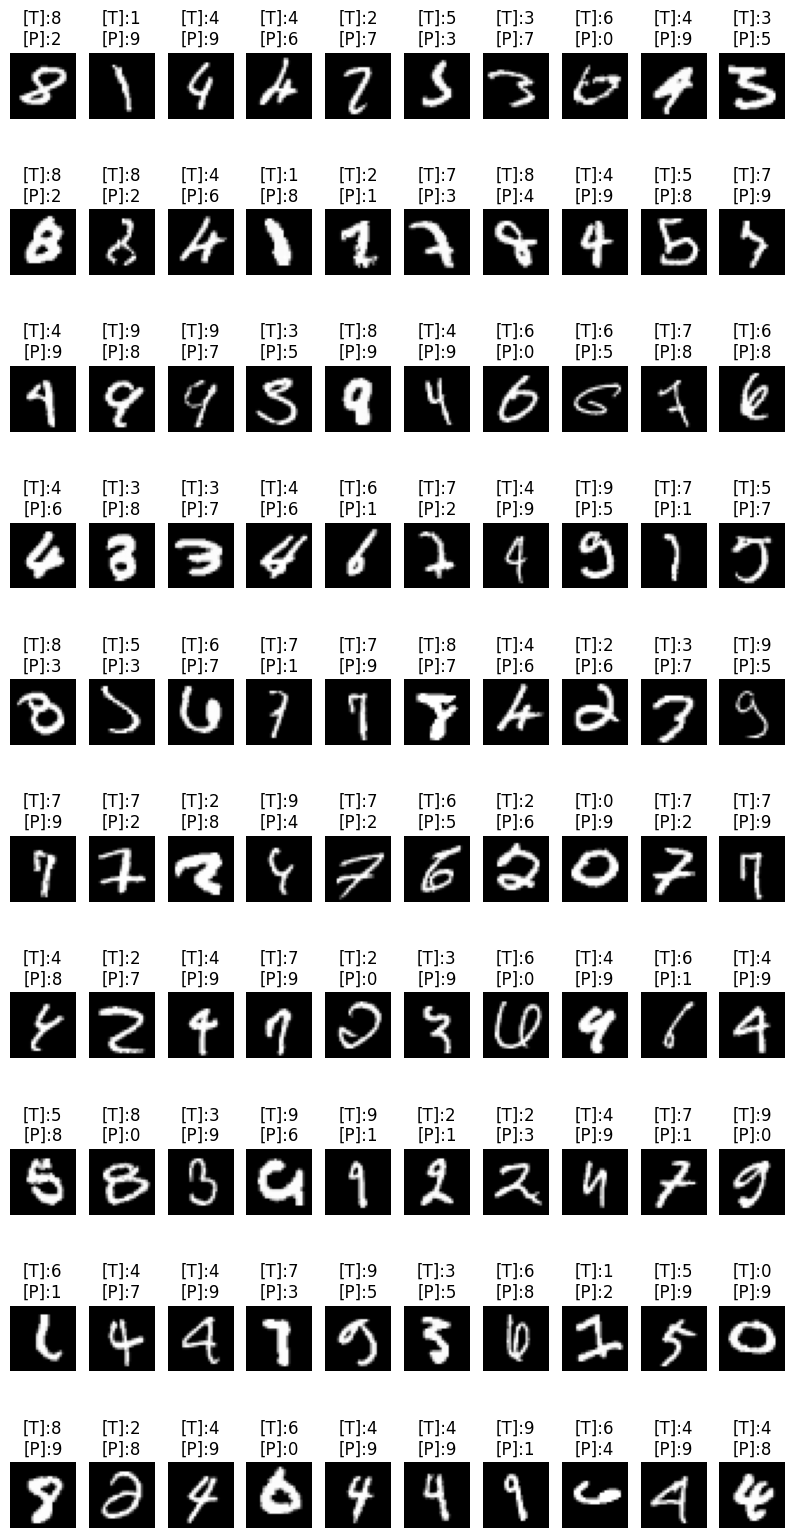

In [73]:
import matplotlib.pyplot as plt
pre = model.predict(x_test_norm).argmax(axis = -1) # -1象徵最後一個軸
print(pre.shape)

neq_idx = np.nonzero(pre != y_test)[0] # 為了把資料從tuple拿出來, 加上[0]
neq_idx_chosen = neq_idx[:100]
neq_x = x_test[neq_idx_chosen]
neq_pre = pre[neq_idx_chosen]
neq_true = y_test[neq_idx_chosen]

plt.figure(figsize = [10, 20])
for i in range(len(neq_idx_chosen)):
    plt.subplot(10, 10, i+1)
    t = "[T]:{}\n[P]:{}".format(neq_true[i], neq_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(neq_x[i], cmap = "gray")

```
MLP判別: 透過像素, 攤開來看
-> 8和2、4和9很類似
-> 人類是看形狀, 而非像素
-> 因此需要透過CNN(卷積網路)突破困境
缺了什麼: 組合(不是像素, 而是透過圓形、方形、直線等等的組合)
```



```
1. 長寬卷積: 組合(Sobel 索伯運算子)
     1 0 -1
Gx = [ 2 0 -2 ] (檢測直線邊緣)
     1 0 -1
*** 係數可以調整, 但建議抵銷橫向的影響
    比如-2改-3, 則兩個-1最好改為-1.5

     1 2 1
Gy = [ 0 0 0 ] (檢測橫線邊緣)
     -1 -2 -1

從3x3的九宮格來看, 28x28 -> 26x26
有:1 無:0

卷積: 以中心像素,結合附近的像素來得到一個新的value(新的意思)


2. 深度卷積(通道數卷積):
[r,g,b] -> 三通道、[c,m,y,k] -> 四通道
將各個顏色(通道)乘上特定係數, 轉為灰階
Ex. PIL函式庫: r*0.299, g*0.587, b*0.114

3. 長寬卷積+深度卷積

-> 深度學習卷積:
   [w1, w2, w3] [w4, w5, w6] [w7, w8, w9]
G = [ ... ... ... ]
   [ ... ... ... ]
*** 先隨便給係數, 再慢慢根據輸入/輸出調整

卷積(前處理) -> MLP(分類器)
*** 前面做: 向量化處理

Ex. 32x32的圖片, 針對f1的狀況(比如:方形邊緣)做九宮格長寬/深度的組合, 變為30x30的灰階邊緣
但! 深度學習會訓練好幾次 -> 做padding(永遠在最外面的一圈加上像素為0的值, 使得學習後保持32x32的同意樣大小)
-> 深度卷積並非只能是rgb, 可以有很多含意,
    比如:紫色強度、模糊化程度、圓形邊緣 ... 等,
    可以擴充出超過3個過濾器 -> 每一格的值有4個代表

*** 中間層的層數, 跟輸入圖片的大小有關嗎?
    -> 有關
    *** 如果你做越多層, 對前一層而言是更大範圍
    -> 想做越大範圍的面積, 就做越多層
    *** 圖片越大、組合的範圍越大(多層一點)
    *** 圖片越小、少層一點

convolution: 卷積
pooling(池化):
1. 平均值池化: Ex. 6x6變成3x3, 特定範圍的值取平均作為代表 -> 太中庸
2. 最大值池化: 特定範圍取最大值作為代表

*** 看長寬就知道有沒有池化, 深度是濾鏡數量
*** 卷積可以平行化(使用GPU運算)

*** 結論: 卷積網路是模仿人類空間感
```

